<center><h1>Tutorial 4 - Use Cases</h1>

## Importing

In [2]:
# Specify path for imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [33]:
from impresso_stats.sql import read_table, db_engine
from impresso_stats.helpers import decade_from_year_df
from impresso_stats.visualization import plt_avg_tl_filter, plt_freq_issues_time

In [14]:
import dask.dataframe as ddf
from impresso_commons.utils.s3 import IMPRESSO_STORAGEOPT

In [19]:
import seaborn as sns
sns.set(style="whitegrid")

## Loading data

In [9]:
engine = db_engine()
issues_df = read_table('impresso.issues', engine)

In [15]:
PATH = '/scratch/students/justine/'
FILE = 's3-impresso-stats'

ci_df = ddf.read_csv(
    PATH+FILE+"/content-item-stats/*",
    storage_options=IMPRESSO_STORAGEOPT
)

In [17]:
issues_df = decade_from_year_df(issues_df)
ci_df = decade_from_year_df(ci_df, dask_df = True)

---

## Issues analysis

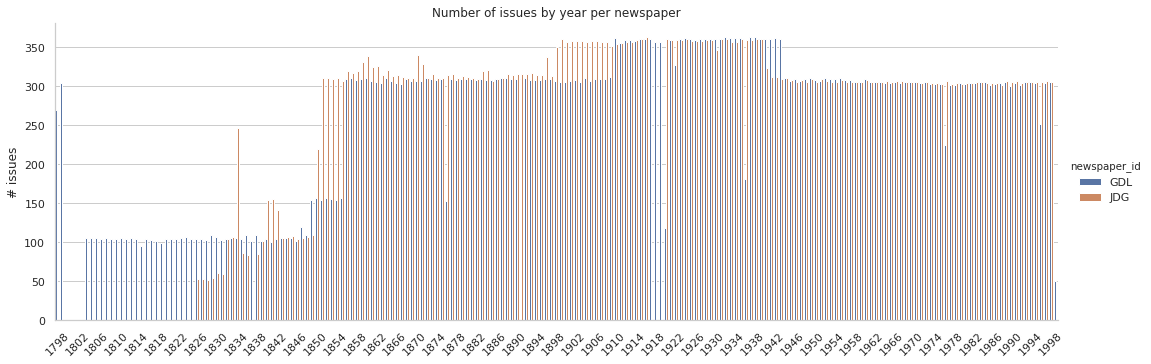

In [28]:
issues_freq_df = plt_freq_issues_time('year', np_ids=['JDG', 'GDL'], df=issues_df)

#### Applying filters

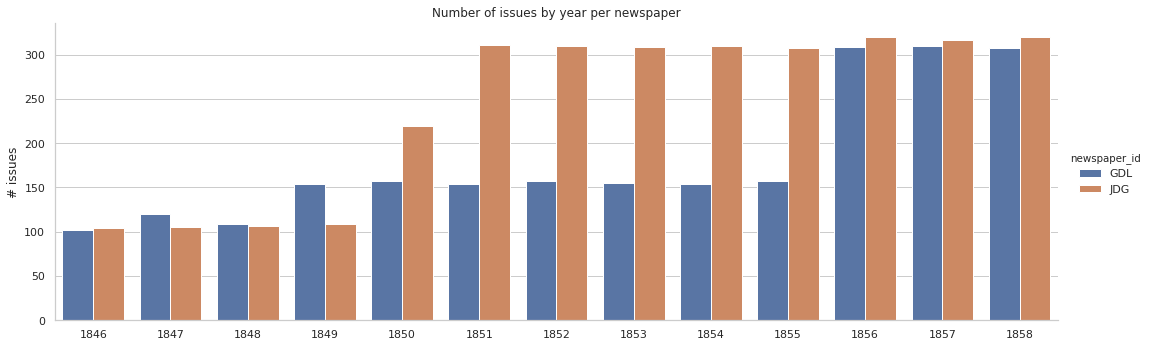

In [29]:
zoom_1_df = plt_freq_issues_time('year', np_ids=['JDG', 'GDL'], df=issues_df, start_date=1846, end_date=1858)

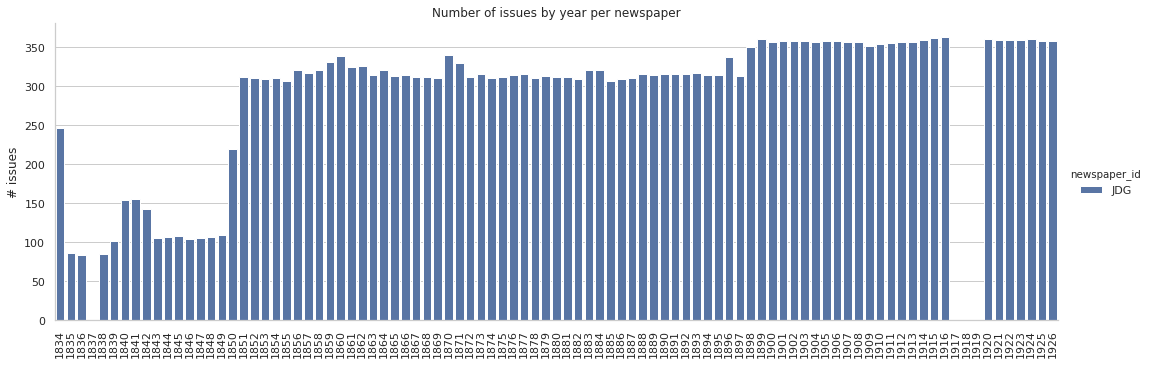

In [30]:
zoom_2_df = plt_freq_issues_time('year', np_ids=['JDG'], df=issues_df, start_date=1834, end_date=1926)

---

## Content items analysis

#### Average title length through time

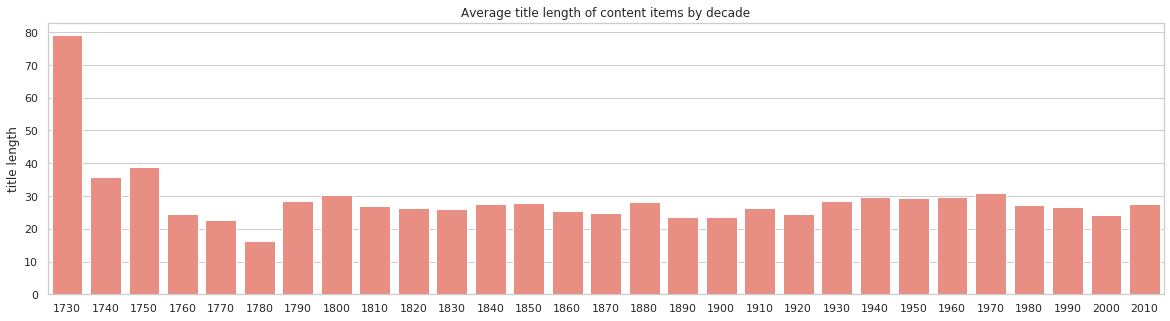

In [35]:
tl_per_decade = plt_avg_tl(ci_df, ['decade'], hide_xtitle=True)

#### Focus on 1730-1739

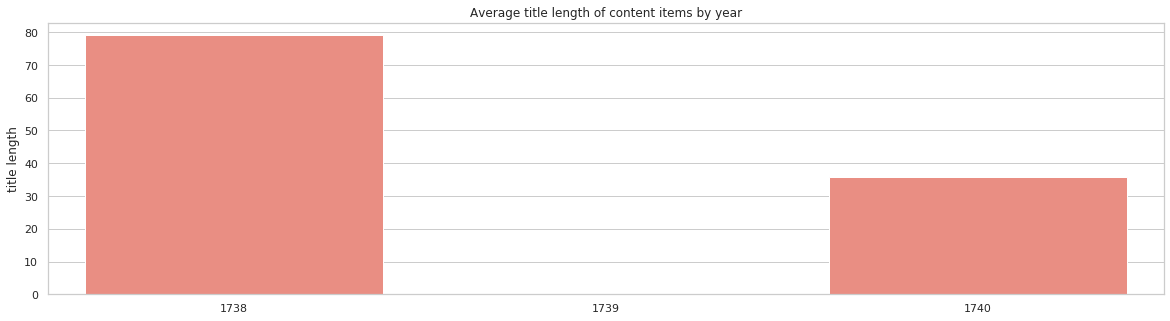

In [43]:
tl_30s = plt_avg_tl_filter(ci_df, ['year'], hide_xtitle=True, start_date=1730, end_date=1740)

#### Looking at the content items frequency and newspapers during this period

In [39]:
from impresso_stats.visualization import plt_freq_ci_filter

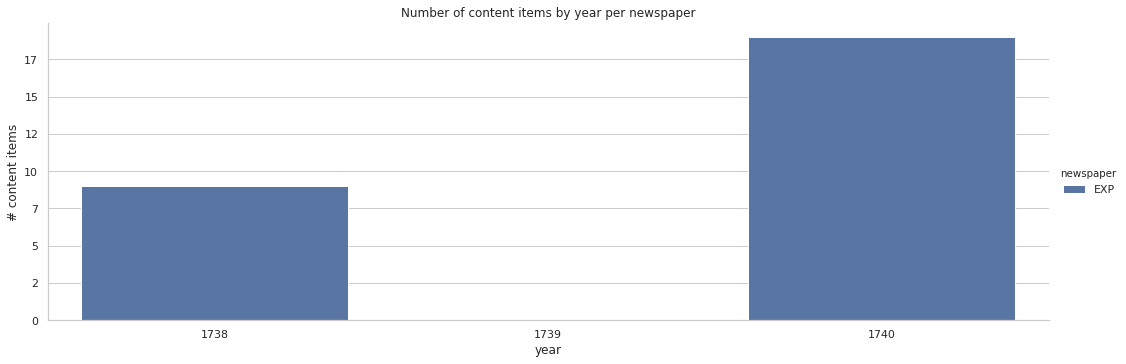

In [40]:
ci_30s = plt_freq_ci_filter(ci_df, ['year', 'newspaper'], start_date=1730, end_date=1740)

#### Focus on EXP

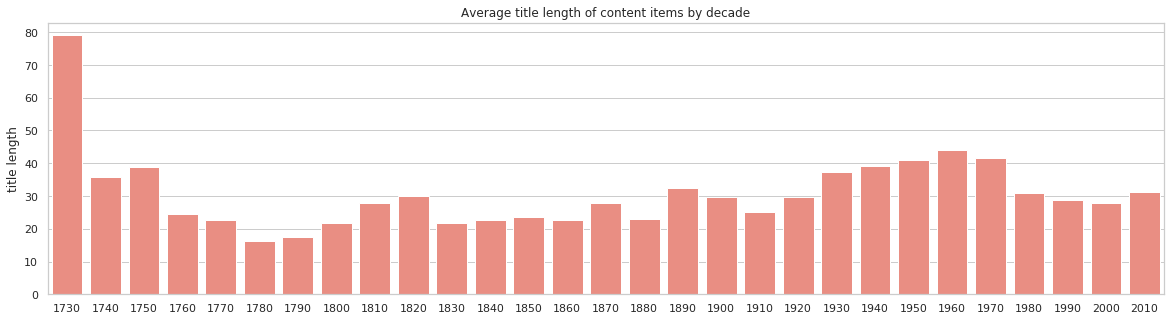

In [42]:
tl_EXP = plt_avg_tl_filter(ci_df, ['decade'], hide_xtitle=True, np_ids=['EXP'])

---

## Another analysis

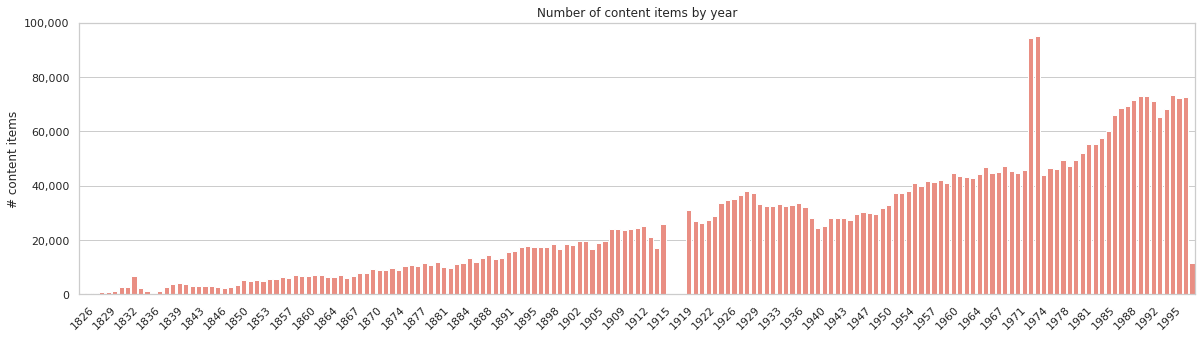

In [49]:
ci_JDG = plt_freq_ci_filter(ci_df, ['year'], np_ids=['JDG'], hide_xtitle=True)

#### Check which types of CI

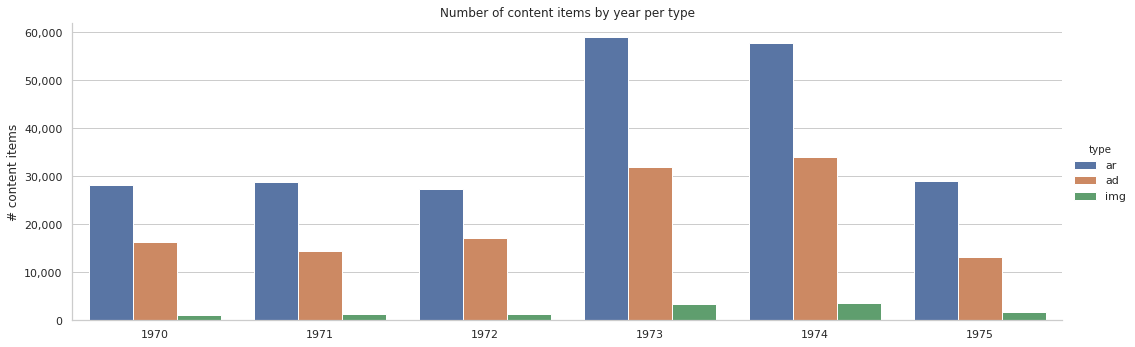

In [50]:
ci_JDG_type = plt_freq_ci_filter(ci_df, ['year', 'type'], np_ids=['JDG'],\
                                 hide_xtitle=True, start_date=1970, end_date=1975)